<a href="https://colab.research.google.com/github/vovaekb/ml_playground/blob/master/src/mnist_simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorials: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
https://mohitatgithub.github.io/2018-03-28-MNIST-Image-Classification-with-CNN-&-Keras/

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import mnist
import os

img_rows = 28
img_cols = 28

In [0]:
# Download dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [0]:
# Preprocess data for training model
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
#more reshaping
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape: ', x_train.shape)

('x_train shape: ', (60000, 28, 28, 1))


In [0]:
# transform labels to vectors
num_category = 10
y_train = np_utils.to_categorical(y_train, num_category)
y_test = np_utils.to_categorical(y_test, num_category)
print(y_train.shape)

(60000, 10)


In [0]:
print(y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Construct the model
model = Sequential()
# convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [0]:
# Train our model on training dataset
model_log = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=10,
         verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 177s 3ms/step - loss: 2.0406 - acc: 0.8163 - val_loss: 0.1071 - val_acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.1251 - acc: 0.9634 - val_loss: 0.0460 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0863 - acc: 0.9754 - val_loss: 0.0448 - val_acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0697 - acc: 0.9801 - val_loss: 0.0472 - val_acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0585 - acc: 0.9828 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0498 - acc: 0.9855 - val_loss: 0.0350 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0453 - acc: 0.9864 - val_loss: 0.0309 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

('Test loss: ', 0.02759987982780294)
('Test accuracy: ', 0.9914)


/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


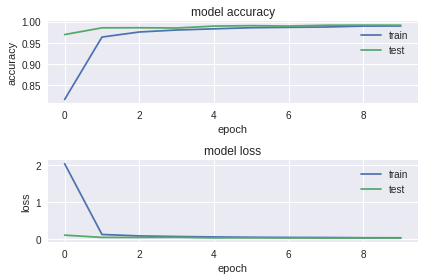

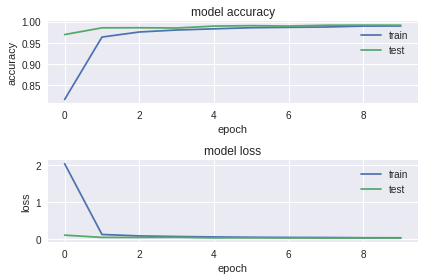

In [0]:
# Visualize training progress
import os
import matplotlib.pyplot as plt
# for displaying inline images in notebook
%matplotlib inline

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower_right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
fig

In [0]:
!touch model_digit.json && touch model_digit.h5

In [0]:
# Save model
# Serialize model to json
model_digit_json = model.to_json()
print(model_digit_json)
with open("model_digit.json", "w") as json_file:
  json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

{"class_name": "Sequential", "keras_version": "2.1.6", "config": [{"class_name": "Conv2D", "config": {"kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "scale": 1.0, "seed": null, "mode": "fan_avg"}}, "name": "conv2d_4", "kernel_constraint": null, "bias_regularizer": null, "bias_constraint": null, "dtype": "float32", "activation": "relu", "trainable": true, "data_format": "channels_last", "filters": 32, "padding": "valid", "strides": [1, 1], "dilation_rate": [1, 1], "kernel_regularizer": null, "bias_initializer": {"class_name": "Zeros", "config": {}}, "batch_input_shape": [null, 28, 28, 1], "use_bias": true, "activity_regularizer": null, "kernel_size": [3, 3]}}, {"class_name": "Conv2D", "config": {"kernel_constraint": null, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "scale": 1.0, "seed": null, "mode": "fan_avg"}}, "name": "conv2d_5", "bias_regularizer": null, "bias_constraint": null, "activat

In [0]:
# load json and create model
from keras.models import model_from_json
model_json = ""
with open("model_digit.json", "r") as json_file:
  model_json = json_file.read()
print(model_json)
loaded_model = model_from_json(model_json)
loaded_model.load_weights("model_digit.h5")
print("Loaded model from file")
print(loaded_model.summary())

{"class_name": "Sequential", "keras_version": "2.1.6", "config": [{"class_name": "Conv2D", "config": {"kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "scale": 1.0, "seed": null, "mode": "fan_avg"}}, "name": "conv2d_4", "kernel_constraint": null, "bias_regularizer": null, "bias_constraint": null, "dtype": "float32", "activation": "relu", "trainable": true, "data_format": "channels_last", "filters": 32, "padding": "valid", "strides": [1, 1], "dilation_rate": [1, 1], "kernel_regularizer": null, "bias_initializer": {"class_name": "Zeros", "config": {}}, "batch_input_shape": [null, 28, 28, 1], "use_bias": true, "activity_regularizer": null, "kernel_size": [3, 3]}}, {"class_name": "Conv2D", "config": {"kernel_constraint": null, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "scale": 1.0, "seed": null, "mode": "fan_avg"}}, "name": "conv2d_5", "bias_regularizer": null, "bias_constraint": null, "activat